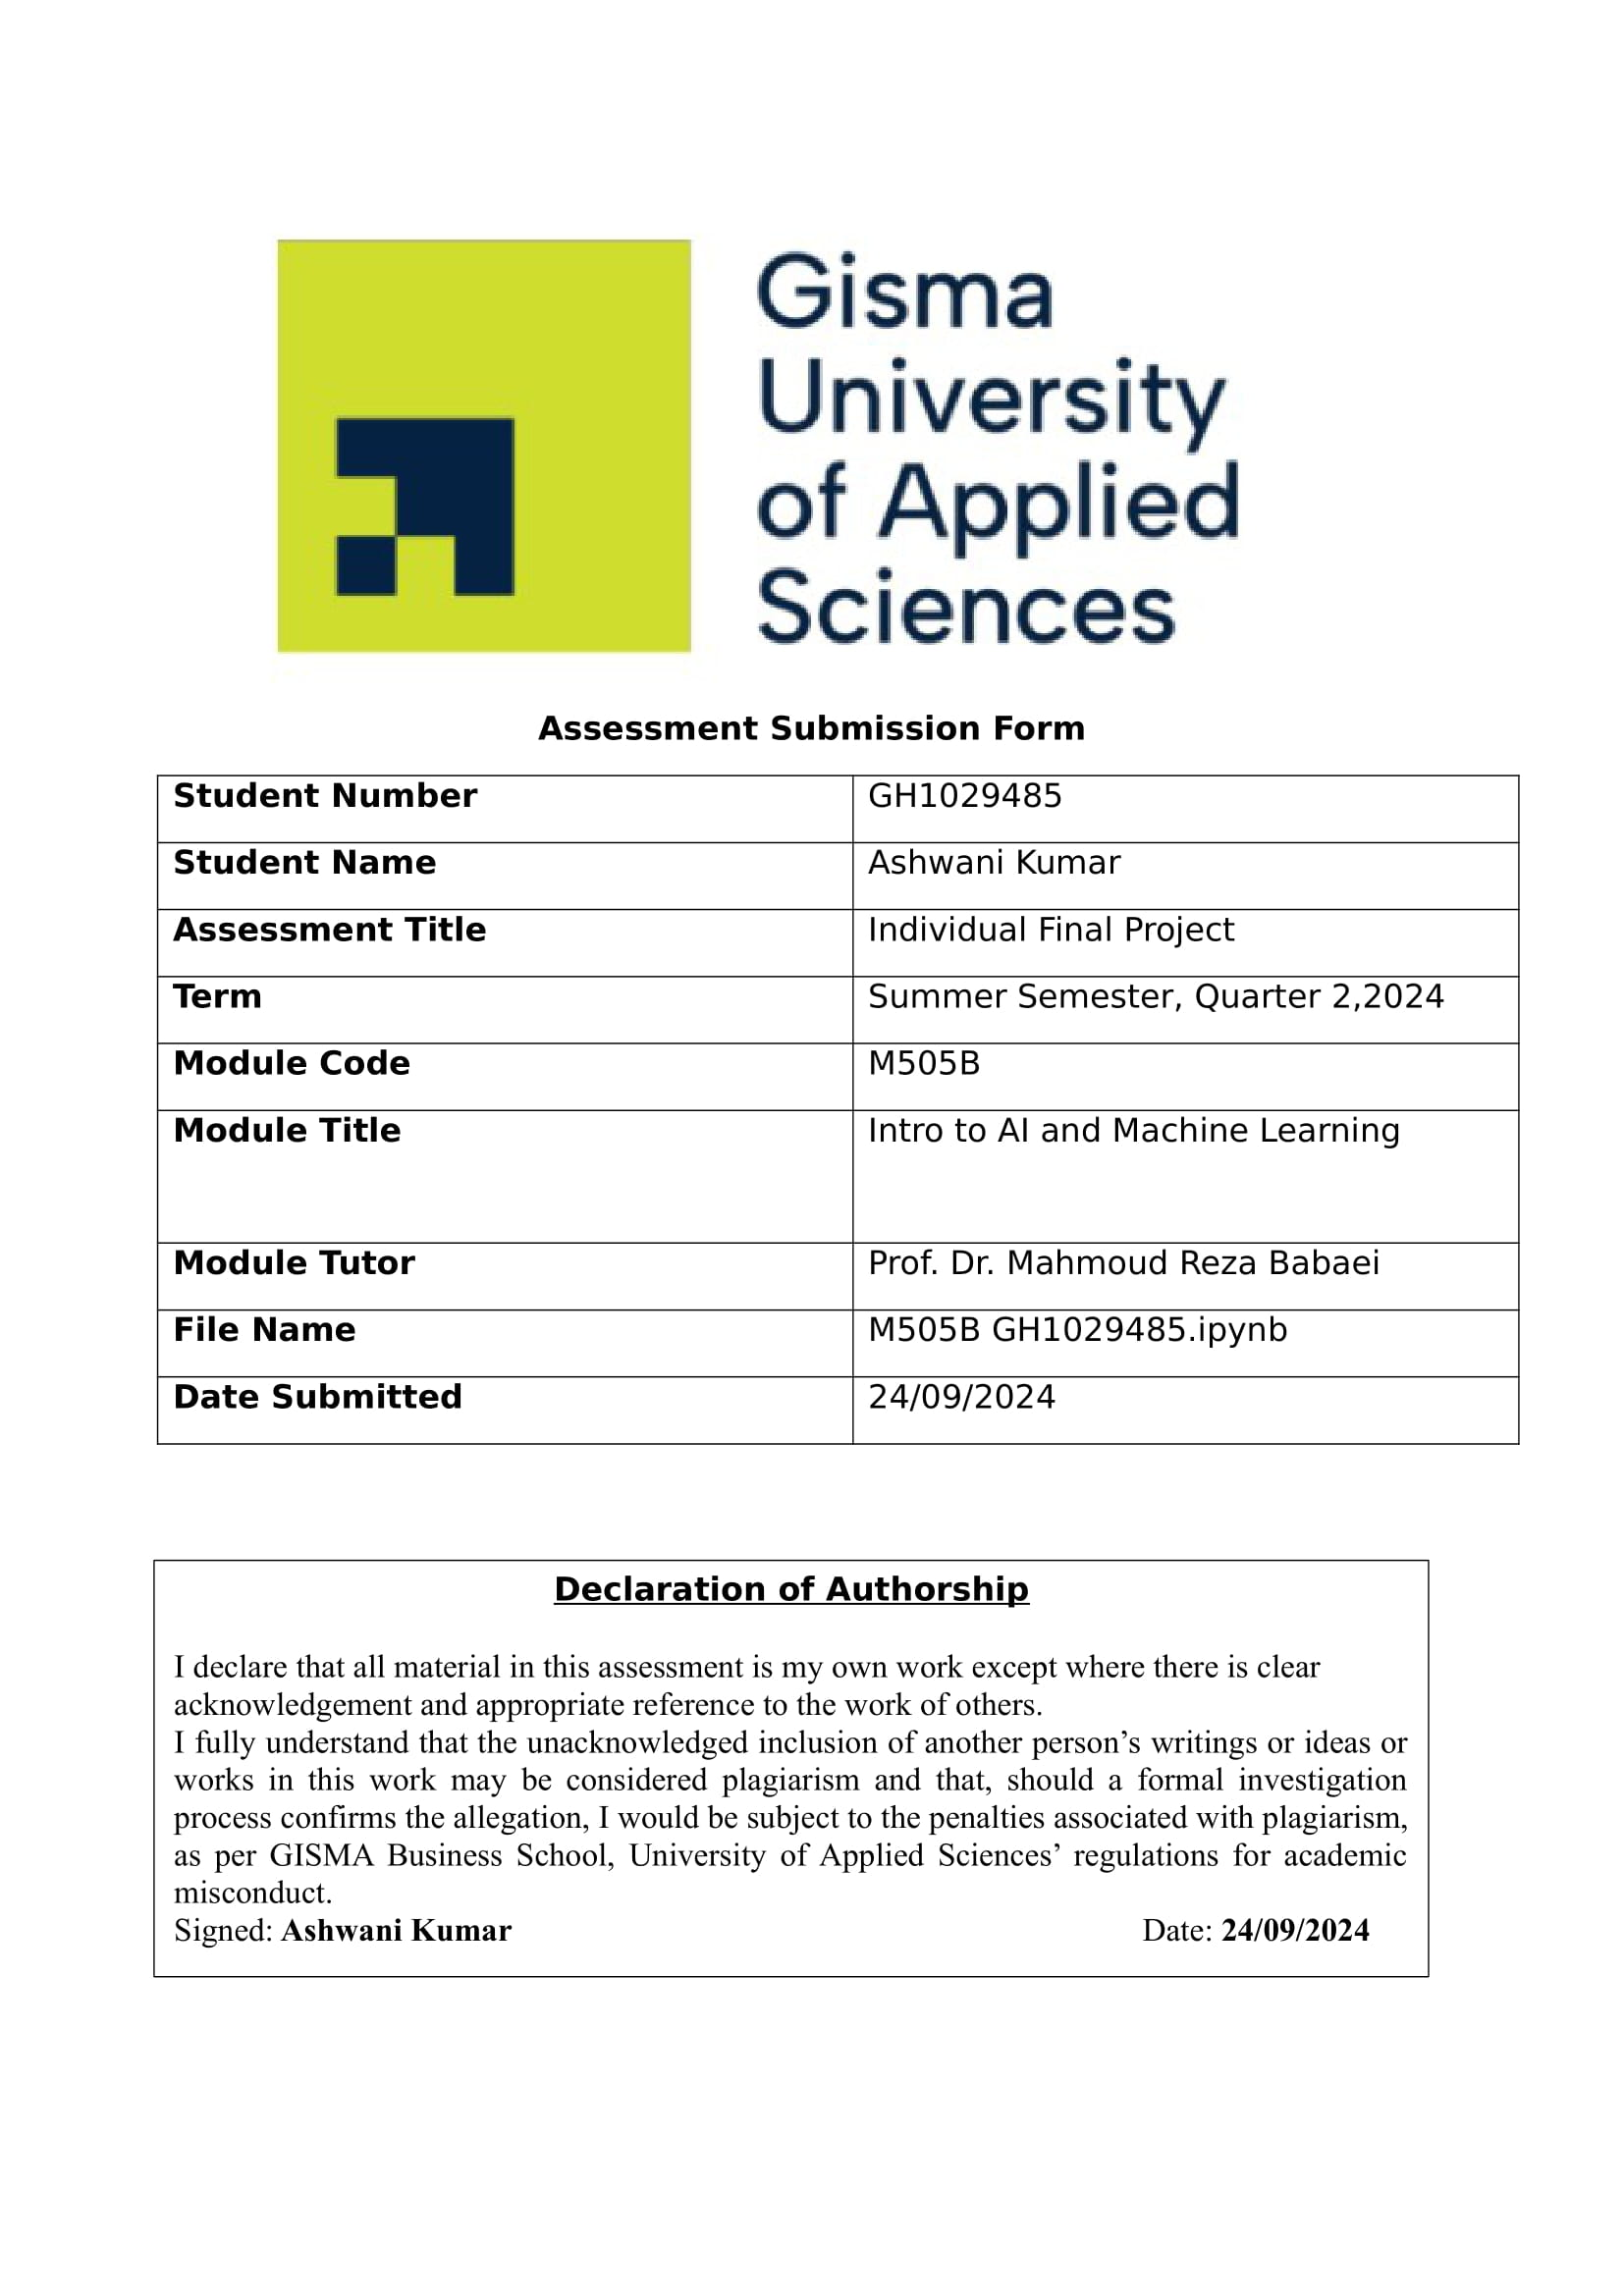

In [19]:
from PIL import Image
img=Image.open("Assessment Submission Form.jpg")
display(img)

# **Title: Walmart Superstore**

# **Problem Statement**


## **Background**

Worldwide, Walmart is one of the giant retailers and oversees a range of stores in different sectors while delivering a diverse set of products. An important element in this management is precisely predicting sales for all stores and products.

## **Business Problem**

The basic business problem involves an inadequate ability to estimate weekly sales effectively for all of Walmart's diverse shops. Inaccurate sales forecasts can lead to either stockouts or overstock situations.
The result of stockouts is lost sales and unhappy customers, these happen when the demand for goods exceeds the supply available. This hurts customer loyalty as well as revenue.
An accumulation of excess inventory because of overstocks causes higher holding costs and results in waste, especially for products that go bad.

## **Importance of solving the problem**

Accurate sales forecasting is crucial for several reasons:

Operational Efficiency: Improved inventory management saves on the costs linked to excess stock and stockouts, resulting in flowing operations.

Customer Satisfaction: Keeping vital common products available builds customer trust and satisfaction, which plays a key role in successful customer retention in an intensely competitive retail market.

Profitability: Low overheads alongside increased sales opportunities thanks to efficient inventory eventually help strengthen the bottom line.


##**Data Exploration**

The organized method of exploring data in the Walmart sales dataset makes it suited for predictive modeling. Even with some data quality problems, such as the risk of outliers and the obligation to ensure categorical consistency, dealing with these can advance the modeling process. The sampling techniques can also become necessary, depending on the distribution of the target variable, to maintain an effective balance in the dataset. The model will result in a deep comprehension of its capabilities via evaluation using metrics that are relevant to both regression and classification situations.


##**Dataset**

Here is the link to the dataset I have used https://www.kaggle.com/datasets/yasserh/walmart-dataset/data

##Loading Libraries

In [74]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.decomposition
import imblearn.over_sampling
import sklearn.svm
import seaborn as sns
import numpy as np
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

##Loading and Reading the Dataset

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart (2).csv


In [22]:
superstore=pd.read_csv('Walmart.csv')
# Display some first few rows
superstore.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [23]:
superstore.shape

(6435, 8)

In [67]:
superstore.describe()

Store  Weekly_Sales  Holiday_Flag   Temperature    Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6.435000e+03  6.435000e+03   
mean     23.000000  1.046965e+06      0.069930 -2.208369e-17 -8.833476e-18   
std      12.988182  5.643666e+05      0.255049  1.000078e+00  1.000078e+00   
min       1.000000  2.099862e+05      0.000000 -2.497901e+00 -1.824133e+00   
25%      12.000000  5.533501e+05      0.000000 -7.734378e-01 -9.346987e-01   
50%      23.000000  9.607460e+05      0.000000  2.199704e-02  1.431463e-01   
75%      34.000000  1.420159e+06      0.000000  7.583583e-01  8.086934e-01   
max      45.000000  3.818686e+06      1.000000  2.495591e+00  2.631792e+00   

                CPI  Unemployment         Year        Month       Week  
count  6.435000e+03  6.435000e+03  6435.000000  6435.000000     6435.0  
mean   2.650043e-17  3.533390e-17  2010.965035     6.447552  25.818182  
std    1.000078e+00  1.000078e+00     0.797019     3.238308  14.129201  
min   -1.214573e+00 -3.161741e+00  2010.000000     1.000000        1.0  
25%   -1.021097e+00 -5.462530e-01  2010.000000     4.000000       14.0  
50%    3.924025e-01  5.183613e-02  2011.000000     6.000000       26.0  
75%    1.039205e+00  4.561966e-01  2012.000000     9.000000       38.0  
max    1.315755e+00  2.643529e+00  2012.000000    12.000000       52.0

In [25]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


##Cleaning Dataset

In [26]:
superstore.isnull()

Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0     False  False         False         False        False       False   
1     False  False         False         False        False       False   
2     False  False         False         False        False       False   
3     False  False         False         False        False       False   
4     False  False         False         False        False       False   
...     ...    ...           ...           ...          ...         ...   
6430  False  False         False         False        False       False   
6431  False  False         False         False        False       False   
6432  False  False         False         False        False       False   
6433  False  False         False         False        False       False   
6434  False  False         False         False        False       False   

        CPI  Unemployment  
0     False         False  
1     False         False  
2     False         False  
3     False         False  
4     False         False  
...     ...           ...  
6430  False         False  
6431  False         False  
6432  False         False  
6433  False         False  
6434  False         False  

[6435 rows x 8 columns]

In [27]:
superstore.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [28]:
superstore.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

# **Exploratory Data Analysis (EDA)**

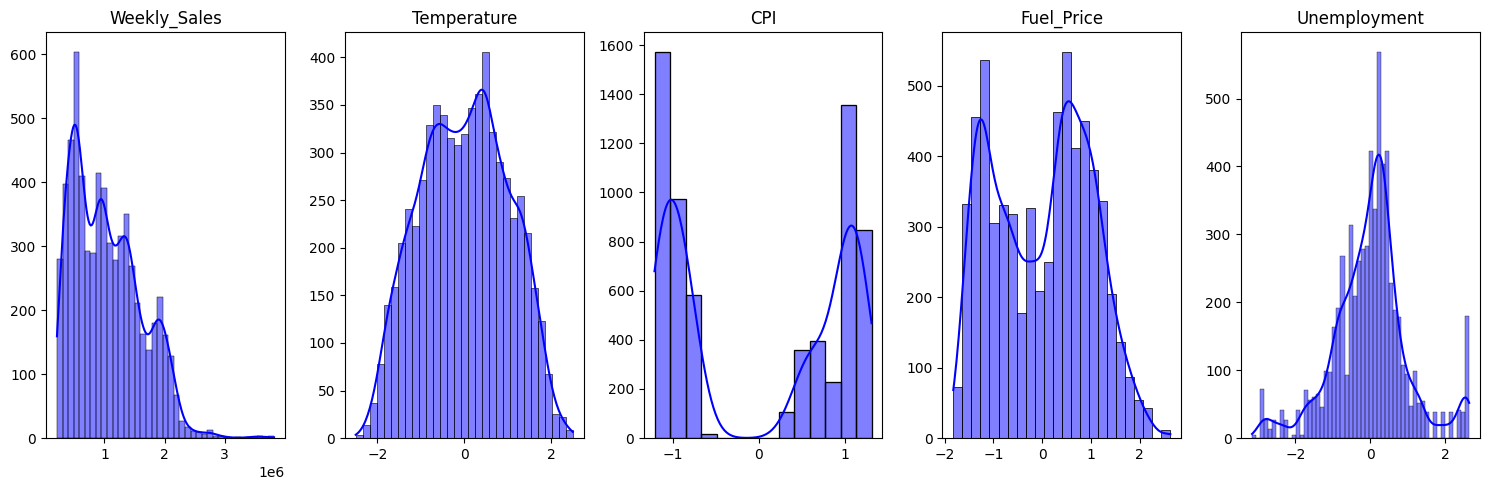

In [62]:
columns = ['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
  sns.histplot(superstore[col], color='blue', kde=True, ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

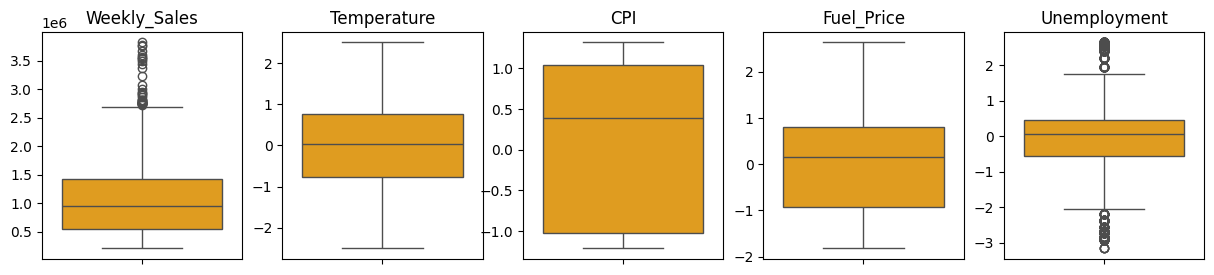

In [66]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(15,10))
for i,colum  in enumerate(columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data=superstore, y=colum,color='orange')
    plt.xlabel('')  # Empty string removes the label
    plt.ylabel('')
    plt.title(colum)

In [34]:
superstore.sample(8)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
90        1  28-10-2011    1445249.09             0        66.57       3.372   
1879     14  25-06-2010    2246179.91             0        79.32       2.808   
2461     18  03-09-2010    1187359.77             0        75.42       2.735   
112       1  30-03-2012    1649604.63             0        67.61       3.845   
5718     40  19-10-2012     918170.50             0        46.33       4.000   
2732     20  21-05-2010    1893736.90             0        60.38       2.958   
919       7  08-04-2011     500552.16             0        30.64       3.532   
1199      9  25-02-2011     513107.20             0        59.01       3.065   

             CPI  Unemployment  
90    217.676679         7.866  
1879  182.380600         8.899  
2461  132.724839         9.342  
112   221.361012         7.348  
5718  138.833613         4.145  
2732  203.877024         7.856  
919   192.341857         8.595  
1199  217.109568         6.416

##**Feature Engineering**

In [35]:
# Convert 'Date' column to datetime
superstore['Date'] = pd.to_datetime(superstore['Date'], format='%d-%m-%Y')

# Feature Engineering: Extracting useful information from 'Date'
superstore['Year'] = superstore['Date'].dt.year
superstore['Month'] = superstore['Date'].dt.month
superstore['Week'] = superstore['Date'].dt.isocalendar().week

# Drop 'Date' to avoid using it as a feature
superstore = superstore.drop('Date', axis=1)

In [36]:
# Ensure there are no string columns left
for col in superstore.columns:
    if superstore[col].dtype == 'object':
        print(f"Non-numeric column detected: {col}")
        print(superstore[col].unique())


In [37]:
# Ensure X (features) and y (target) are consistent in size
X = superstore.drop('Weekly_Sales', axis=1)
y = superstore['Weekly_Sales']

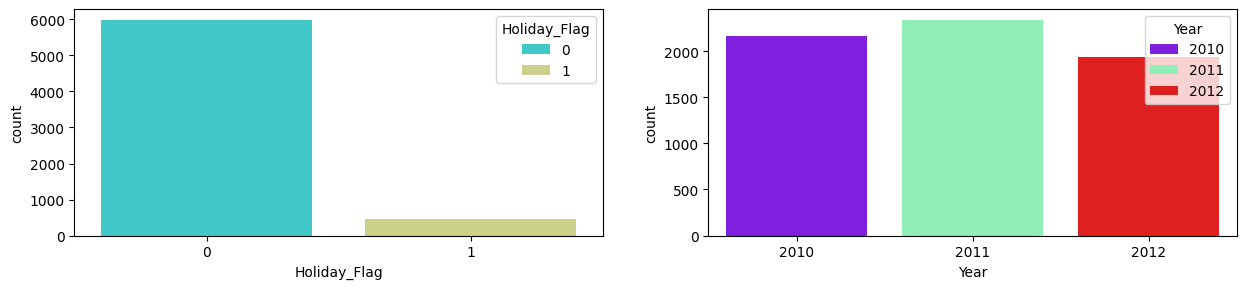

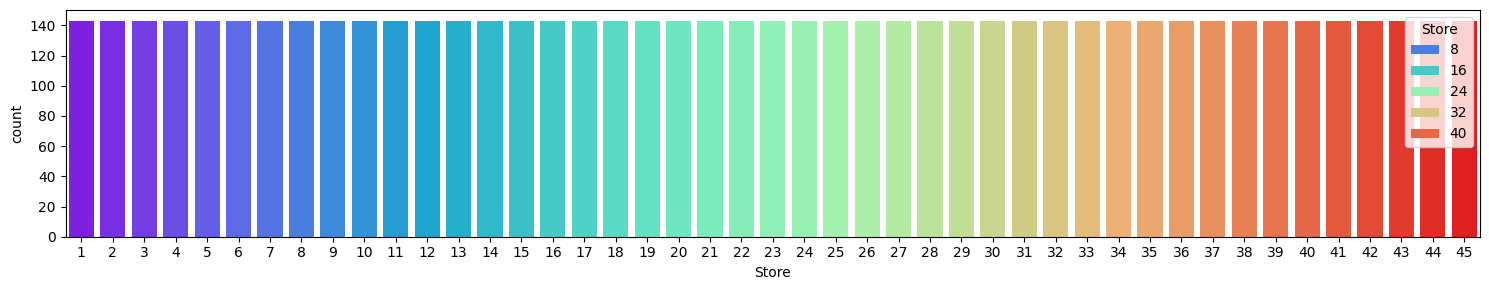

In [38]:
plt.figure(figsize=(15, 10))

# Countplot for Holiday_Flag
plt.subplot(3, 2, 1)
sns.countplot(x="Holiday_Flag", data=superstore, palette="rainbow",hue=superstore["Holiday_Flag"])

# Countplot for Year
plt.subplot(3, 2, 2)
sns.countplot(x="Year", data=superstore, palette="rainbow",hue=superstore["Year"])

# Countplot for Store
plt.figure(figsize=(15, 3))
sns.countplot(x="Store", data=superstore, palette="rainbow",hue=superstore["Store"])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Sales Weekly')

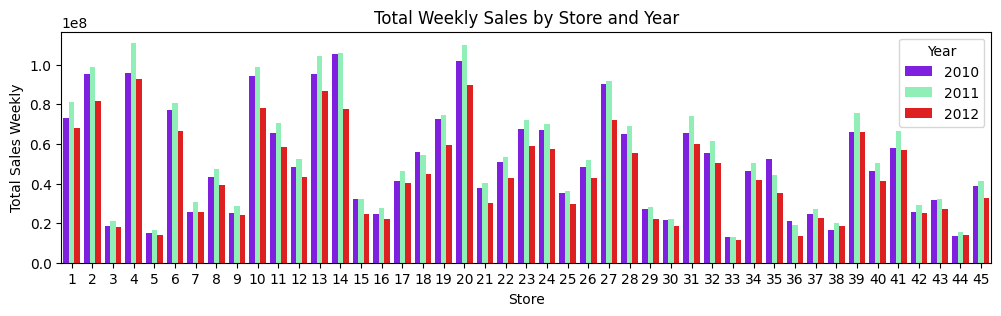

In [72]:
store_year_sales = superstore.groupby(["Store", "Year"])["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(12, 3))
sns.barplot(x="Store", y="Weekly_Sales", hue="Year", data=store_year_sales, palette="rainbow")
plt.title("Total Weekly Sales by Store and Year")
plt.xlabel("Store")
plt.ylabel("Total Sales Weekly")

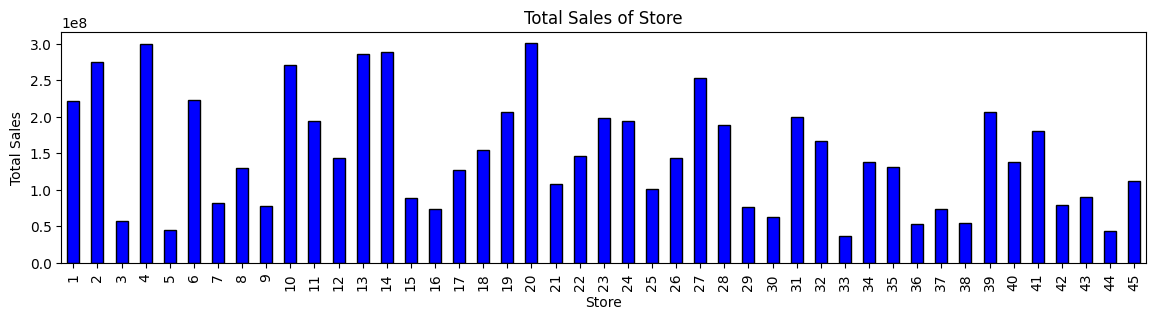

In [76]:
# Calculate total sales per store
store_sales = superstore.groupby("Store")["Weekly_Sales"].sum()

# Create the bar plot
plt.figure(figsize=(14, 3))
store_sales.plot(kind="bar", color="blue", edgecolor="black")

# Customize the plot
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.title("Total Sales of Store")
plt.xlabel("Store")

plt.show()

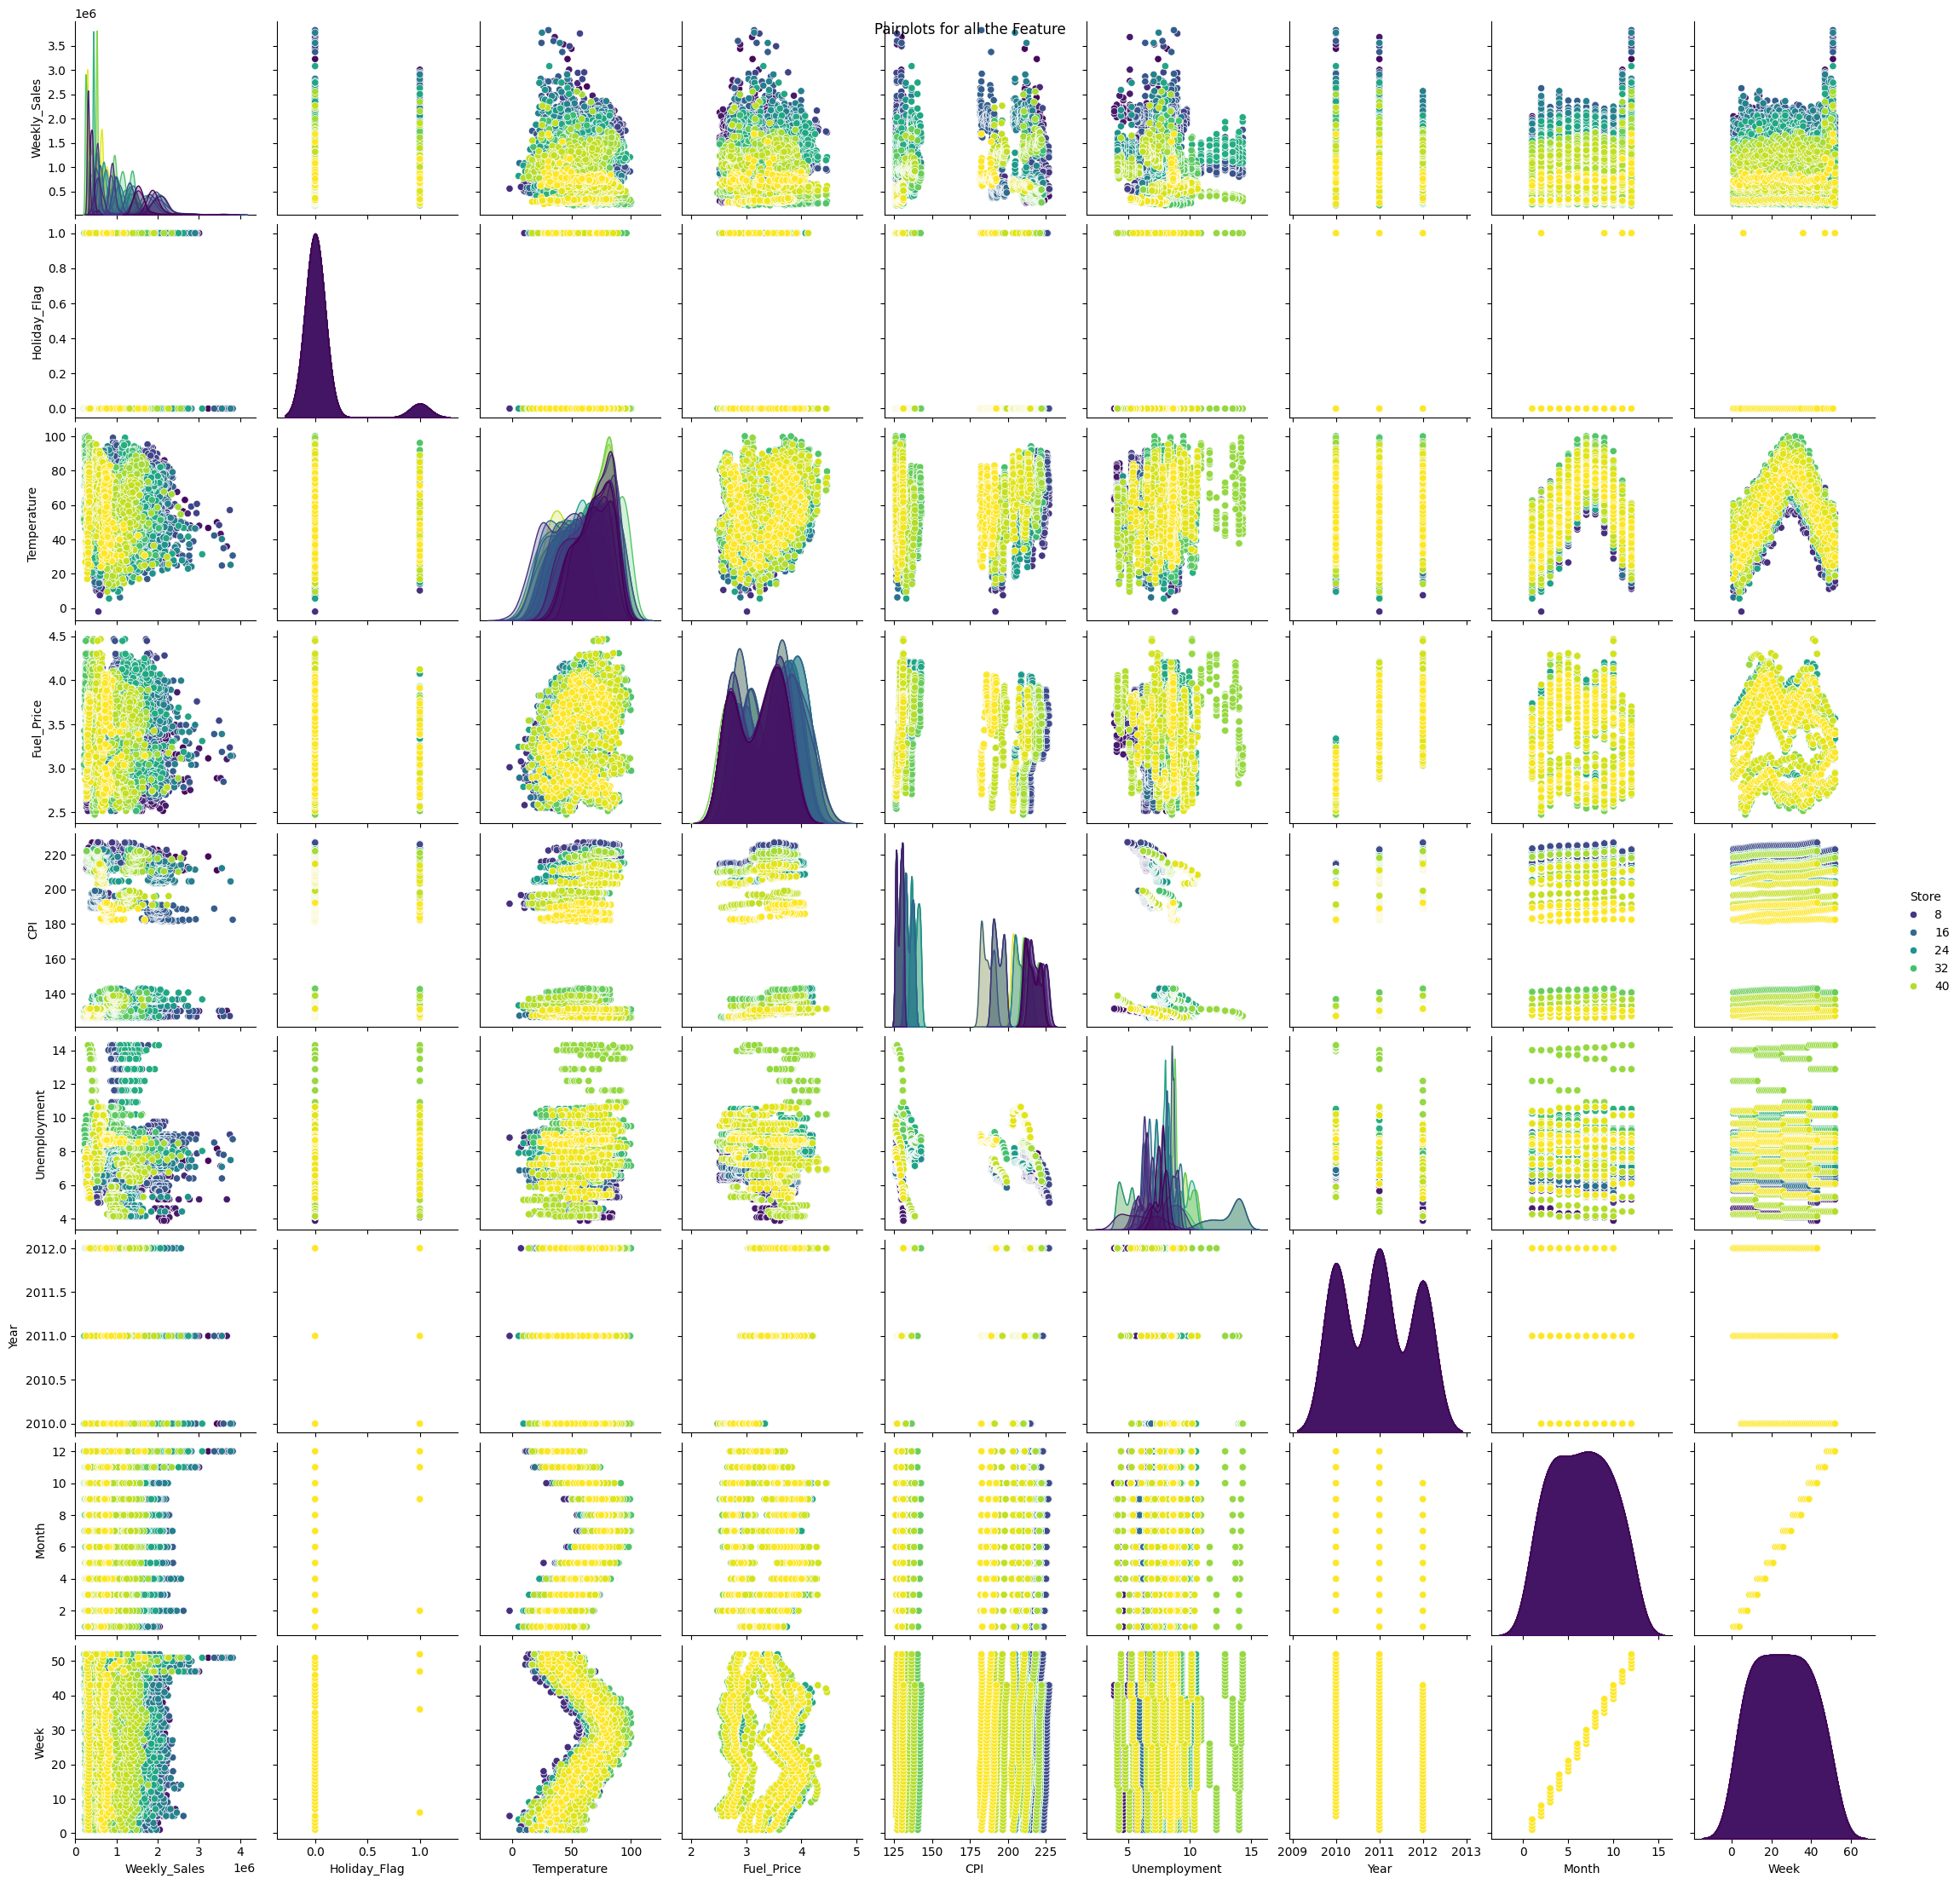

In [41]:
# Create pair plots for all features
g = sns.pairplot(superstore, hue="Store", palette="viridis")
g.fig.suptitle("Pairplots for all the Feature")

plt.show()

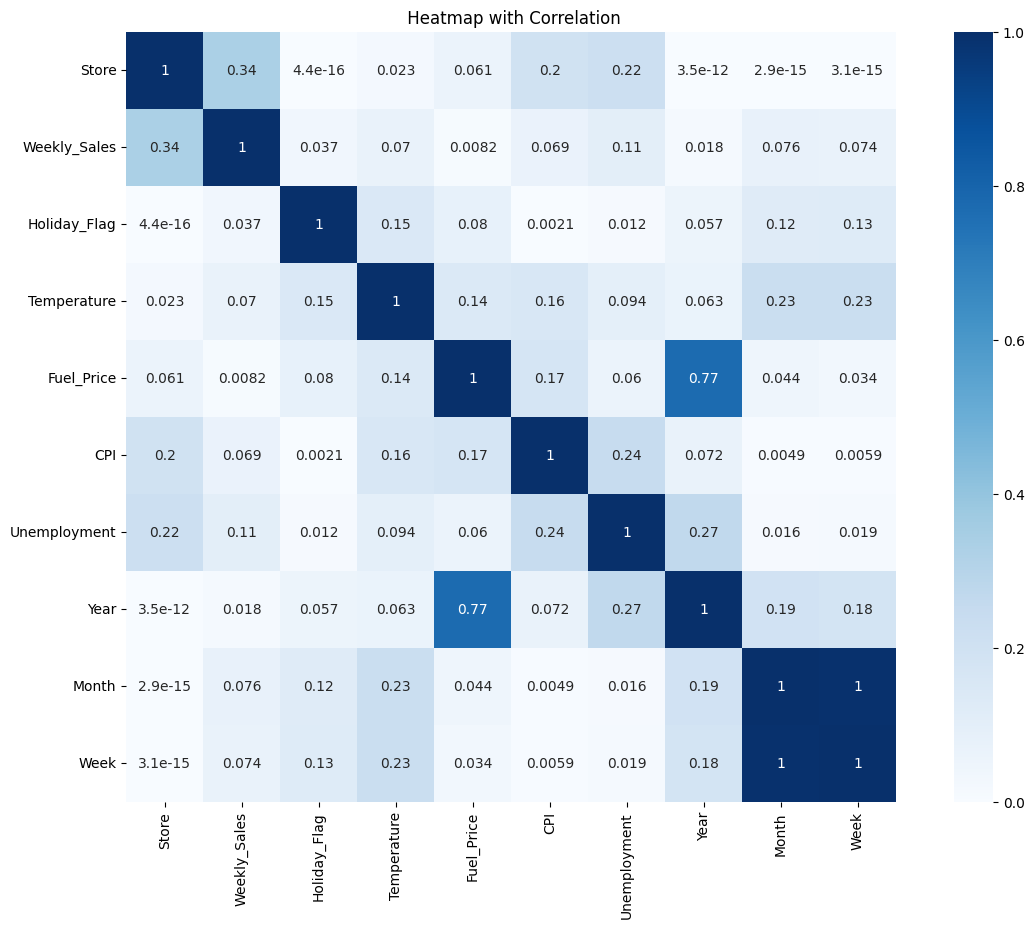

In [73]:
# Selecting the numeric columns
numeric_cols = superstore.select_dtypes(include=np.number).columns

# Calculating the correlation matrix for numeric columns
matrix = abs(superstore[numeric_cols].corr())

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap='Blues', square=True)
plt.title(" Heatmap with Correlation")
plt.show()

In [75]:
# Select numerical columns for transformation
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Initialize PowerTransformer
pt = PowerTransformer(standardize=True)

# Apply transformation and update the DataFrame
superstore[num_cols] = pt.fit_transform(superstore[num_cols])

# Display Box-Cox lambda values
pd.DataFrame({"cols": num_cols, "box-cox lamda": pt.lambdas_})

cols  box-cox lamda
0   Temperature       1.011565
1    Fuel_Price       1.017382
2           CPI       0.994545
3  Unemployment       0.998648

In [46]:
# Removing the Outliers
def remove_outliers(superstore, columns):
    for column in columns:
        Q1 = superstore[column].quantile(0.25)
        Q3 = superstore[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define outliers as any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
        superstore = superstore[(superstore[column] >= Q1 - 1.5 * IQR) & (superstore[column] <= Q3 + 1.5 * IQR)]
    return superstore

columns = ["Weekly_Sales", "Temperature","Unemployment"]

# Remove outliers
df_clean = remove_outliers(superstore, columns)
df_clean

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0         1    1643690.90             0    -1.016852   -1.636569  1.006488   
1         1    1641957.44             1    -1.188661   -1.681842  1.009396   
2         1    1611968.17             0    -1.125230   -1.745699  1.010332   
3         1    1409727.59             0    -0.813498   -1.657340  1.010940   
4         1    1554806.68             0    -0.819743   -1.536004  1.011547   
...     ...           ...           ...          ...         ...       ...   
6430     45     713173.95             0     0.148445    1.439317  0.605881   
6431     45     733455.07             0     0.149024    1.409888  0.609348   
6432     45     734464.36             0    -0.421922    1.446683  0.612811   
6433     45     718125.53             0    -0.317112    1.370727  0.612890   
6434     45     760281.43             0    -0.189578    1.159386  0.612405   

      Unemployment  Year  Month  Week  
0         0.181498  2010      2     5  
1         0.181498  2010      2     6  
2         0.181498  2010      2     7  
3         0.181498  2010      2     8  
4         0.181498  2010      3     9  
...            ...   ...    ...   ...  
6430      0.488005  2012      9    39  
6431      0.479308  2012     10    40  
6432      0.479308  2012     10    41  
6433      0.479308  2012     10    42  
6434      0.479308  2012     10    43  

[5853 rows x 10 columns]

In [47]:
superstore.sample(10)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
3371     24    1196105.44             0     0.340126    1.152148 -0.873576   
1974     14    1875686.44             0     0.048076    1.513111  0.579266   
2533     18     937522.77             0    -1.775184    0.361545 -0.853951   
548       4    2207214.81             0     0.357464    0.540333 -1.042366   
133       1    1494122.38             0     0.932188    0.540333  1.221387   
800       6    1336044.75             0     0.985942    0.192278  1.140265   
417       3     391811.60             0     1.476544    0.252904  1.283210   
5879     42     484097.03             0     0.868503   -0.681684 -1.211213   
3811     27    1723739.44             0    -0.577815    0.766330 -0.741815   
2803     20    1945808.26             0     0.065723    0.598202  0.980697   

      Unemployment  Year  Month  Week  
3371      0.317930  2011      9    35  
1974      0.427771  2012      4    16  
2533      0.164402  2012      1     3  
548      -2.682215  2012      5    20  
133      -0.535162  2012      8    34  
800      -0.524100  2011      9    38  
417      -0.926543  2012      8    32  
5879      0.896050  2010      5    21  
3811      0.069959  2011     11    46  
2803     -0.303124  2011      9    39

##**Testing and Training**

In [49]:
# Splitting the data into Training and Testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    print(model)
    print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
    print(f'R2 : {r2_score(Y_test,y_pred)}')

In [51]:
# Check if the split sizes are consistent
print(f"X_train size: {X_train.shape}")
print(f"y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_test size: {y_test.shape}")

X_train size: (4504, 9)
y_train size: (4504,)
X_test size: (1931, 9)
y_test size: (1931,)


# Linear Regression

In [53]:
# Training the model Using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Model Prediction
y_pred = model.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 519374.66406939336
R-squared: 0.15629457081827836


# Decision Tree Regressor

In [54]:
# Training the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and Evaluate
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = tree_mse ** 0.5
tree_r2 = r2_score(y_test, tree_pred)

print(f"\nDecision Tree Regressor Results:")
print(f"RMSE: {tree_rmse}")
print(f"R-squared: {tree_r2}")


Decision Tree Regressor Results:
RMSE: 146780.27799767852
R-squared: 0.9326147668842857


# Random Forest Regressor

In [55]:
# Training the Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict and Evaluate
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = forest_mse ** 0.5
forest_r2 = r2_score(y_test, forest_pred)

print(f"\nRandom Forest Regressor Results:")
print(f"RMSE: {forest_rmse}")
print(f"R-squared: {forest_r2}")


Random Forest Regressor Results:
RMSE: 119480.32022889431
R-squared: 0.9553499366756638


# SVC

In [57]:
# Converting target variable into categorical classes
# Here, I create arbitrary classes based on sales (low/medium/high)
y_class = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Split the new target classes
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train SVC Model
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_cls, y_train_cls)

# Predict and Evaluate
svc_pred = svc_model.predict(X_test_cls)
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(y_test_cls, svc_pred)

print(f"\nSupport Vector Classifier (SVC) Results:")
print(f"Accuracy: {svc_accuracy}")


Support Vector Classifier (SVC) Results:
Accuracy: 0.7878787878787878


In [58]:
# Create a list of models
model_list = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Support Vector Classifier"]

# Create a list of r2 scores
r2_list = [0.15, 0.93, 0.95, 0.78]

# To find the index of the best model
best_model_index = r2_list.index(max(r2_list))

# Get the best model
best_model = model_list[best_model_index]

# Print the best model
print(f"The best model is: {best_model}")

The best model is: Random Forest Regressor


# **Conclusion**

In this study of the Walmart dataset, I utilized a complete machine-learning pipeline to forecast weekly sales for different stores. I found that the Random Forest Regressor leads the other models in predictive accuracy upon evaluating multiple regression models comprising Linear Regression, Decision Tree Regressor, and Support Vector Classifier.

###**Key Findings:**

Model Performance: Reaching an RMSE of about 119,480 and an R² of 0.95, the Random Forest Regressor achieved its results. This shows that the model can describe a large fraction of the variation in weekly sales data, making it a reliable pick for this prediction job.

Feature Importance: The model can reveal which factors have the greatest impact on weekly sales. Walmart looks to these attributes to acquire data for making intelligent selections in the field of inventory management, marketing strategies, and resource allocation.

###**Recommendations**

Apply the Random Forest Regressor as the leading forecast model for predicting weekly sales because of its high degree of precision and the ability to withstand overfitting.

Periodic Model Retraining: Fitting changing market conditions and improving accuracy requires regular new sales data addition to the model.

Feature Analysis: Initiate an extended assessment of the principal contributions by diverse elements, including temperature, fuel costs, and holiday markers, to design improved business approaches and increase the precision of sales predictions.

Ultimately, the rollout of this machine learning pipeline both offers an accurate forecasting model and furnishes Walmart with insights that are actionable and can help inform strategic moves.


###**Explanation**
Though the Random Forest Regressor is a more complex implementation than linear models, it still offers a certain level of explainability that offers vital insight into the factors driving weekly sales. The ability to convey model predictions well and further insight into the dynamics of the raw data is provided with feature importance metrics. The approach is not only powerful for making predictions but also advantageous for making choices within the business sector.